In [1]:
import yaml
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
!pwd
data_folder = '../../data/b07/'
!ls $data_folder

/datasets/home/home-00/05/105/ppathuri/Fake_news/src/data
2020-03-22_2020-08-01_ids.jsonl  data


In [3]:
!pwd
config_path = '../../config/data_params.yaml'
!cat $config_path

/datasets/home/home-00/05/105/ppathuri/Fake_news/src/data
start_date: '2020-03-22'
end_date: '2020-08-01'
outdir: 'data/raw'


In [4]:
def load_config(path):
    """Load the configuration from config."""
    return yaml.load(open(path, 'r'), Loader=yaml.SafeLoader)

config = load_config(config_path)
start_date = config['start_date']
end_date = config['end_date']

data_file = start_date + '_' + end_date + '_ids.jsonl'
path_to_data = data_folder + data_file
!ls $path_to_data

../../data/b07/2020-03-22_2020-08-01_ids.jsonl


In [5]:
def tweets(filepath):
    for line in open(filepath):
        yield line

In [6]:
gen = tweets(path_to_data)
twt = next(gen)
twt_dic = json.loads(twt)
for key in twt_dic.keys():
    print(key)

created_at
id
id_str
full_text
truncated
display_text_range
entities
extended_entities
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
possibly_sensitive
lang


In [7]:
twt_dic

{'created_at': 'Sun Mar 22 04:01:29 +0000 2020',
 'id': 1241575703012716544,
 'id_str': '1241575703012716544',
 'full_text': '327 #Covid19 positive cases in India, \n\nMaharashtra -64\n\nKerala -52\n\nDelhi -26\n\nUttar Pradesh- 26\n\nRajasthan -23\n\nTelangana -21\n\nTN - 6\n\nhttps://t.co/ItngnPEJjh https://t.co/6EGM2NK3vp',
 'truncated': False,
 'display_text_range': [0, 160],
 'entities': {'hashtags': [{'text': 'Covid19', 'indices': [4, 12]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/ItngnPEJjh',
    'expanded_url': 'https://covidout.in/',
    'display_url': 'covidout.in',
    'indices': [137, 160]}],
  'media': [{'id': 1241575692866711552,
    'id_str': '1241575692866711552',
    'indices': [161, 184],
    'media_url': 'http://pbs.twimg.com/media/ETr2g7cUcAAaQPM.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/ETr2g7cUcAAaQPM.jpg',
    'url': 'https://t.co/6EGM2NK3vp',
    'display_url': 'pic.twitter.com/6EGM2NK3vp',
    'expanded_url': 'ht

In [19]:
%%time
tweet_gen = tweets(path_to_data)
hashtag_counts = {}
while True:
    try:
        twt = next(tweet_gen)
        twt_dic = json.loads(twt)
        for tag in twt_dic['entities']['hashtags']:
            if tag['text'] not in hashtag_counts:
                hashtag_counts[tag['text']] = 1
            else:
                hashtag_counts[tag['text']] += 1
                
    except StopIteration:
        break

CPU times: user 1min 21s, sys: 2.47 s, total: 1min 24s
Wall time: 1min 24s


In [26]:
tag_counter = Counter(hashtag_counts)

In [63]:
most_common = tag_counter.most_common(10)

In [64]:
labels = [elem[0] for elem in most_common]
values = [elem[1] for elem in most_common]

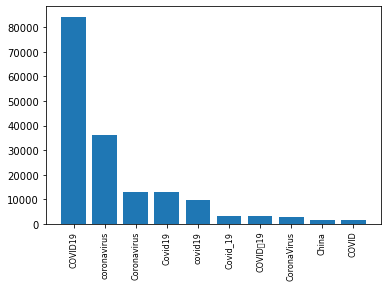

In [65]:
indexes = np.arange(len(labels))

plt.bar(labels, values)
plt.xticks(indexes, labels, rotation='vertical', fontsize=8)
plt.show()

In [8]:
%%time
tweet_gen = tweets(path_to_data)
retweet = None
while True:
    try:
        twt = next(tweet_gen)
        twt_dic = json.loads(twt)
        # retweeted_status is only a key if the tweet is a retweet
        # the value of retweeted_status is the original tweet 
        if 'retweeted_status' in twt_dic.keys():
            retweet = twt_dic
            break
    except StopIteration:
        break

CPU times: user 1.33 ms, sys: 695 µs, total: 2.03 ms
Wall time: 1.35 ms


In [9]:
retweet

{'created_at': 'Sun Mar 22 04:01:36 +0000 2020',
 'id': 1241575732926730241,
 'id_str': '1241575732926730241',
 'full_text': 'RT @SenMikeLee: OVER MY DEAD BODY https://t.co/B8BRbvRDDa',
 'truncated': False,
 'display_text_range': [0, 57],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'SenMikeLee',
    'name': 'Mike Lee',
    'id': 88784440,
    'id_str': '88784440',
    'indices': [3, 14]}],
  'urls': [{'url': 'https://t.co/B8BRbvRDDa',
    'expanded_url': 'https://www.politico.com/news/2020/03/21/doj-coronavirus-emergency-powers-140023',
    'display_url': 'politico.com/news/2020/03/2…',
    'indices': [34, 57]}]},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1206737321325924352,
  'id_str': '1206737321325924352',
  